In [34]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# gas = ct.Solution("seiser.cti")  # Change .cti file to standard simple reaction
gas = ct.Solution("2S_methane.cti")
# gas.Y = np.array([0.5, 0, 0.5, 0, 0])
gas.TP = 1200, 101325
gas.TD = 1200, 10
reactor = ct.IdealGasReactor(gas)
exhaust_gas = ct.Solution("2S_methane.cti")
exhaust = ct.Reservoir(exhaust_gas)
mfc = ct.MassFlowController(upstream = reactor, downstream = exhaust, mdot = 1e1)  # mdot = nozzle_nasa_mdot
# sim.advance(5.93e-6)
#gas.Y = np.array([0.25, 0.25, 0.25, 0.25, 0, 0])
gas.Y = np.ones(gas.n_species) / gas.n_species
# gas.set_equivalence_ratio(phi=1.0, fuel='nc7h16', oxidizer={'o2':1.0, 'n2':3.76})
np.save(".npy files/ini_mass_fraction.npy", gas.Y)
sim = ct.ReactorNet([reactor])
gas()


  CH4_CM2:

       temperature            1200  K
          pressure     4.04438e+06  Pa
           density              10  kg/m^3
  mean mol. weight         24.6697  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy     -3.6287e+06       -8.952e+07     J
   internal energy     -4.0331e+06        -9.95e+07     J
           entropy          9466.5        2.335e+05     J/K
    Gibbs function     -1.4988e+07       -3.698e+08     J
 heat capacity c_p          2021.5        4.987e+04     J/K
 heat capacity c_v          1684.4        4.155e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                O2       0.128493         0.166667         -25.4521
               H2O       0.228229         0.166667         -47.4928
               CH4       0.256291         0.166667         -31.2398
                CO      

In [36]:
gas.density

10.0

In [37]:
# gas.TP = 1200, 101325
# gas.set_equivalence_ratio(phi=1.0, fuel='nc7h16', oxidizer={'o2':1.0, 'n2':3.76})
# reactor = ct.IdealGasReactor(gas)  # This and below line causing bugs?
# sim = ct.ReactorNet([reactor])
n_t = 200
Pt = np.zeros(n_t)
Tt = np.zeros(n_t)
Yt = np.zeros((gas.n_species,n_t))
Rhot = np.zeros(n_t)  # New array for changing density of gases, representing incoming mass flux
for i in range(n_t):
    print(gas.density)
    sim.advance((i+1)*1e-7)
    Pt[i] = gas.P
    Tt[i] = gas.T
    Yt[:,i] = gas.Y
    Rhot[i] = gas.density
    # gas.DP = 1, 1
    # gas.TP = 1200, 101325
    # print(nozzle_nasa_mdot((i+1)*1e-14))
gas()
# gas.DP

10.0
9.999998999999999
9.999998
9.999996999999999
9.999996
9.999995
9.999994
9.999993
9.999991999999999
9.999991
9.99999
9.999989
9.999988
9.999986999999999
9.999986
9.999984999999999
9.999984
9.999983
9.999982
9.999981
9.999979999999999
9.999979
9.999977999999999
9.999977
9.999976
9.999975
9.999974
9.999972999999999
9.999972
9.999971
9.99997
9.999969
9.999967999999999
9.999967
9.999965999999999
9.999965
9.999964
9.999963
9.999962
9.999960999999999
9.999959999999998
9.999958999999999
9.999958
9.999956999999998
9.999956
9.999954999999998
9.999953999999999
9.999952999999998
9.999951999999999
9.999951
9.999949999999998
9.999948999999999
9.999947999999998
9.999946999999999
9.999946
9.999944999999999
9.999944
9.999942999999998
9.999941999999999
9.999940999999998
9.999939999999999
9.999939
9.999937999999998
9.999937
9.999935999999998
9.999934999999999
9.999933999999998
9.999932999999999
9.999932
9.999930999999998
9.999929999999999
9.999928999999998
9.999927999999999
9.999927
9.99992599999999

In [38]:
Pt

array([3118039.80708996, 3118039.40017191, 3118038.99325386,
       3118038.58633583, 3118038.17941779, 3118037.77249977,
       3118037.36558175, 3118036.95866375, 3118036.55174576,
       3118036.14482779, 3118035.73790982, 3118035.33099187,
       3118034.92407394, 3118034.51715601, 3118034.1102381 ,
       3118033.7033202 , 3118033.29640232, 3118032.88948444,
       3118032.48256658, 3118032.07564873, 3118031.6687309 ,
       3118031.26181308, 3118030.85489527, 3118030.44797747,
       3118030.04105969, 3118029.63414191, 3118029.22722416,
       3118028.82030641, 3118028.41338868, 3118028.00647096,
       3118027.59955325, 3118027.19263555, 3118026.78571787,
       3118026.3788002 , 3118025.97188255, 3118025.5649649 ,
       3118025.15804727, 3118024.75112966, 3118024.34421197,
       3118023.93729429, 3118023.53037662, 3118023.12345896,
       3118022.71654131, 3118022.30962368, 3118021.90270606,
       3118021.49578845, 3118021.08887085, 3118020.68195327,
       3118020.27503569,

Text(0, 0.5, 'Mass Fraction')

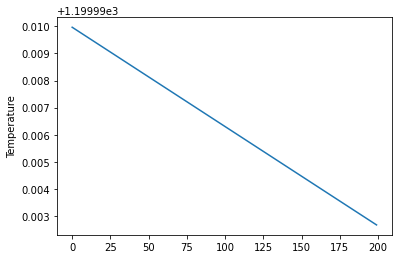

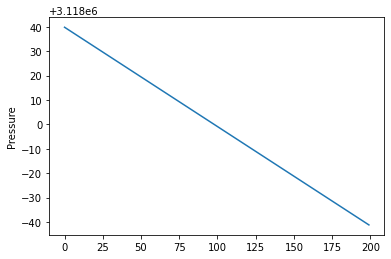

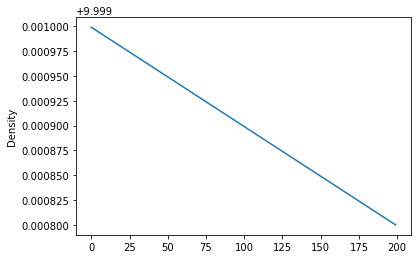

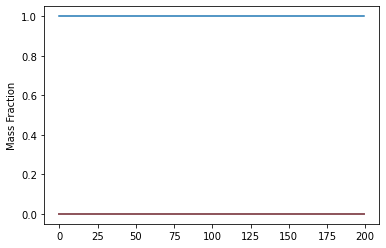

In [41]:
plt.plot(Tt)
plt.ylabel("Temperature")
plt.figure()
plt.plot(Pt)
plt.ylabel("Pressure")
plt.figure()
plt.plot(Rhot)
plt.ylabel("Density")
plt.figure()

for i in range(gas.n_species):
    plt.plot(Yt[i,:])

plt.ylabel("Mass Fraction")

####

In [40]:
np.save('.npy files/pressure.npy', Pt)
np.save('.npy files/temperature.npy', Tt)
np.save('.npy files/mass_fraction.npy', Yt)

In [25]:
tbd = []
falofr = []
elmr = []
for i in range(gas.n_reactions):
    if (isinstance(gas.reaction(i), ct.ThreeBodyReaction)):
        tbd.append(i)
    elif (isinstance(gas.reaction(i), ct.FalloffReaction)):
        falofr.append(i)
    else:
        elmr.append(i)

In [26]:
NASA_coeffs = []
for i in range(gas.n_species):
    NASA_coeffs.append(gas.species(i).thermo.coeffs)
NASA_coeffs = np.array(NASA_coeffs)
reactants = []
orders = [] 
Af = np.zeros(len(elmr))
beta = np.zeros(len(elmr))
E = np.zeros(len(elmr))

In [10]:
rec2ind = dict()
for i in range(gas.n_species):
    reactants.append(gas.species(i).name)
    rec2ind[gas.species(i).name] = i
orders = gas.reactant_stoich_coeffs()[:,elmr]
for i, s in enumerate(elmr):   
    Af[i] = gas.reaction(s).rate.pre_exponential_factor
    beta[i] = gas.reaction(s).rate.temperature_exponent
    E[i] = gas.reaction(s).rate.activation_energy
    for rec in gas.reaction(s).orders:
        orders[rec2ind[rec], i] = gas.reaction(s).orders[rec]
reversible = np.array([int(gas.reaction(i).reversible) for i in range(gas.n_reactions)])

In [11]:
np.save('.npy files/NASA_coeffs.npy', NASA_coeffs)
np.save('.npy files/molecular_weights.npy',gas.molecular_weights)
np.save('.npy files/reactants_stoich_coeffs.npy',gas.reactant_stoich_coeffs())
np.save('.npy files/product_stoich_coeffs.npy',gas.product_stoich_coeffs())
np.save('.npy files/reaction_orders.npy',orders)
np.save('.npy files/pre_exponential_factor.npy', Af)
np.save('.npy files/temperature_exponent.npy', beta)
np.save('.npy files/activation_energy.npy', E)
np.save('.npy files/delta_standard_entropy.npy', gas.delta_standard_entropy)
np.save('.npy files/delta_standard_enthalpy.npy', gas.delta_standard_enthalpy)
np.save('.npy files/reversible.npy', reversible)

In [12]:
efficiency_f = np.zeros((gas.n_species, len(falofr)))
Af_lo = np.zeros(len(falofr))
beta_lo = np.zeros(len(falofr))
E_lo = np.zeros(len(falofr))
Af_hi = np.zeros(len(falofr))
beta_hi = np.zeros(len(falofr))
E_hi = np.zeros(len(falofr))
orders_f = gas.reactant_stoich_coeffs()[:,falofr]
falloff_parameters = np.zeros((4, len(falofr)))
troefall = []
troefall_coeff = []
for i, s in enumerate(falofr):
    rr = gas.reaction(s)
    Af_lo[i] = rr.low_rate.pre_exponential_factor
    beta_lo[i] = rr.low_rate.temperature_exponent
    E_lo[i] = rr.low_rate.activation_energy
    Af_hi[i] = rr.high_rate.pre_exponential_factor
    beta_hi[i] = rr.high_rate.temperature_exponent
    E_hi[i] = rr.high_rate.activation_energy
    efficiency_f[:,i] = rr.default_efficiency * np.ones(gas.n_species)
    if(isinstance(rr.falloff, ct.TroeFalloff)):
        troefall.append(i)
        troefall_coeff.append(rr.falloff.parameters)
    #falloff_parameters[:,i] = gas.reaction(s).falloff.parameters
    for rec in rr.efficiencies:
        efficiency_f[rec2ind[rec]] = rr.efficiencies[rec]
    for rec in gas.reaction(s).orders:
        orders_f[rec2ind[rec], i] = gas.reaction(s).orders[rec]

np.save('.npy files/efficiency_f.npy', efficiency_f)
np.save('.npy files/troefall_coeff.npy', np.array(troefall_coeff).T)
np.save('.npy files/troefall.npy', troefall)
np.save('.npy files/reaction_orders_f.npy',orders_f)
np.save('.npy files/pre_exponential_factor_hi.npy', Af_hi)
np.save('.npy files/temperature_exponent_hi.npy', beta_hi)
np.save('.npy files/activation_energy_hi.npy', E_hi)
np.save('.npy files/pre_exponential_factor_lo.npy', Af_lo)
np.save('.npy files/temperature_exponent_lo.npy', beta_lo)
np.save('.npy files/activation_energy_lo.npy', E_lo)

In [13]:
efficiency_t = np.zeros((gas.n_species, len(tbd)))
Af_t = np.zeros(len(tbd))
beta_t = np.zeros(len(tbd))
E_t = np.zeros(len(tbd))
orders_t = gas.reactant_stoich_coeffs()[:,tbd]
for i, s in enumerate(tbd):
    rr = gas.reaction(s)
    Af_t[i] = rr.rate.pre_exponential_factor
    beta_t[i] = rr.rate.temperature_exponent
    E_t[i] = rr.rate.activation_energy
    efficiency_t[:,i] = rr.default_efficiency * np.ones(gas.n_species)
    for rec in rr.efficiencies:
        efficiency_t[rec2ind[rec]] = rr.efficiencies[rec]
    for rec in gas.reaction(s).orders:
        orders_t[rec2ind[rec], i] = gas.reaction(s).orders[rec]
        
np.save('.npy files/efficiency_t.npy',efficiency_t)
np.save('.npy files/reaction_orders_t.npy',orders_t)
np.save('.npy files/pre_exponential_factor_t.npy', Af_t)
np.save('.npy files/temperature_exponent_t.npy', beta_t)
np.save('.npy files/activation_energy_t.npy', E_t)

In [14]:
np.save('.npy files/tbd.npy',tbd)
np.save('.npy files/falofr.npy',falofr)
np.save('.npy files/elmr.npy',elmr)

In [15]:
ai = gas.reaction(0).high_rate.pre_exponential_factor
bi = gas.reaction(0).high_rate.temperature_exponent
ei = gas.reaction(0).high_rate.activation_energy
kf_h = ai * (gas.T**bi) * np.exp(-ei/(ct.gas_constant * gas.T))
kf_h

AttributeError: 'cantera._cantera.ElementaryReaction' object has no attribute 'high_rate'

In [16]:
ai = gas.reaction(0).low_rate.pre_exponential_factor
bi = gas.reaction(0).low_rate.temperature_exponent
ei = gas.reaction(0).low_rate.activation_energy
kf_o = ai * (gas.T**bi) * np.exp(-ei/(ct.gas_constant * gas.T)) * gas.concentrations.dot(efficiency_f[:,0])
kf_o

AttributeError: 'cantera._cantera.ElementaryReaction' object has no attribute 'low_rate'

In [17]:
kf_o / (1 + kf_o / kf_h)

NameError: name 'kf_o' is not defined

In [23]:
np.array(troefall_coeff).shape

(20, 4)

In [22]:
help(gas.reaction(0).falloff)

Help on TroeFalloff object:

class TroeFalloff(Falloff)
 |  The 3- or 4-parameter Troe falloff function.
 |  
 |  :param params:
 |      An array of 3 or 4 parameters: :math:`[a, T^{***}, T^*, T^{**}]` where
 |      the final parameter is optional (with a default value of 0).
 |  
 |  Method resolution order:
 |      TroeFalloff
 |      Falloff
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __reduce__ = __reduce_cython__(...)
 |      TroeFalloff.__reduce_cython__(self)
 |  
 |  __setstate__ = __setstate_cython__(...)
 |      TroeFalloff.__setstate_cython__(self, __pyx_state)
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  falloff_type = 110
 | 

In [17]:
# gas.reaction().falloff.parameters

In [24]:
A = gas.reaction(falofr[10]).falloff.parameters
T = 1
A[0] + A[1] * T**3 + A[2] * T + A[3] * T**2

IndexError: index 0 is out of bounds for axis 0 with size 0

In [25]:
gas.reaction(falofr[1]).falloff

In [18]:
def nozzle_nasa_mdot(t):
    # Can represent mass inflow by increasing combined gas's density
    """
    Compute the efflux of the combustor via simple isentropic relations.
    The efficiency of the nozzle is modeled using a discharge coefficient
    :param t: time
    :return: mass flux at the outlet (efflux) of the combustion chamber.
    """
    # Avoid a unity pressure ratio at startup
    # print(gas.T)
    epsilon = 1.0
    _rho = gas.density
    _press = gas.P
    _area = 1  # arbitrarily chosen value, [m^2]
    _gamma_s = gas.cp / gas.cv
    _temp = gas.T
    _r_gas_specific = gas.cp - gas.cv
    _p_ratio = 101325 / (gas.P + epsilon)  # Exhaust pressure is atmospheric pressure

    power_1 = 2.0 / _gamma_s
    power_2 = (_gamma_s + 1.0) / (_gamma_s)
    pressure_term = _p_ratio ** power_1 - _p_ratio ** power_2
    _sqrt_term = 2. * _gamma_s * _r_gas_specific * _temp / (_gamma_s - 1.0)
    _sqrt_term *= pressure_term
    assert (_sqrt_term >= 0.0)
    _sqrt_term = np.sqrt(_sqrt_term)

    _mdot_unchoked = _rho * _area * _sqrt_term

    power = (_gamma_s + 1.0) / (_gamma_s - 1.0)
    _gamma_term = (2. / (_gamma_s + 1.0)) ** power
    _sqrt = np.sqrt(_gamma_s * _r_gas_specific * _temp * _gamma_term)
    _mdot_choked = _rho * _area * _sqrt

    _mdot = 0.0
    _p_crit_downstream = _press * (2. / (_gamma_s + 1.0)) ** (_gamma_s / (_gamma_s - 1.0))

    if _p_crit_downstream < 101325:  # Less than exhaust pressure = P_atm
        # Unchoked conditions
        _mdot = _mdot_unchoked
    else:
        # Choked conditions
        _mdot = _mdot_choked

    return _mdot  # * _geom_nozzle['C_d']  # Discharge coefficient

1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788777414
1199.9926788

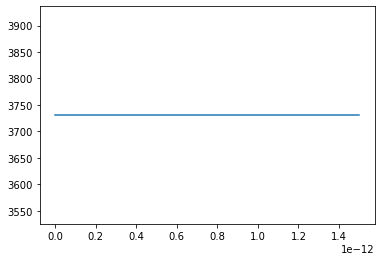

In [19]:
t = np.arange(0, 1.5*10**(-12), 1.5*10**(-14))
_mdot = np.zeros(len(t))

reactor = ct.IdealGasReactor(gas)  # Need to re-initialize reactor before running sim
sim = ct.ReactorNet([reactor])

for i in range(len(t)):
    sim.advance((i)*1e-7)
    _mdot[i] = nozzle_nasa_mdot(t[i])
    print(gas.T)
    
    
# print(t.shape) 
# print(_mdot.shape)
plt.plot(t, _mdot)  # For debugging